In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-08-22 06:49:06--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-08-22 06:49:06--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc04ecd0eb916b328fdfd8067c55.dl.dropboxusercontent.com/zip_download_get/BlrKQi68yD4vRs-edgeuUsgyaM_VgO3kWLDWoMEjzh3j2kcv7OQ0L-GNB7OfvWjXhoNXwCVVCm31RdSLzEU2mmucPvide6cp2bckNqt7AeUWdg# [following]
--2023-08-22 06:49:07--  https://uc04ecd0eb916b328fdfd8067c55.dl.dropboxusercontent.com/zip_download_get/BlrKQi68yD4vRs-edgeuUsgyaM_VgO3kWLDWoMEjzh3j2kcv7OQ0L-GNB7OfvWjXhoNXwCVVCm31RdSLzEU2mmucPvide6

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
classes = os.listdir("images/Train")
classes

['Bulbasaur', 'Pikachu', 'Charmander']

In [6]:
def print_number_of_files(p):
    for c in classes:
        path=str(p)+"/"+c
        print(c,len(os.listdir(path)))

In [7]:
print("training data")
print_number_of_files("images/Train/")

training data
Bulbasaur 101
Pikachu 101
Charmander 102


In [8]:
print("test data")
print_number_of_files("images/Test/")

test data
Bulbasaur 41
Pikachu 40
Charmander 42


In [9]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from keras_preprocessing import image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
def get_data_from_file(p):
    train_data=[] #X
    train_lables=[] #Y
    for c in classes:
        path=str(p)+"/"+c
        for img_name in os.listdir(path):
            img_path=path+"/"+img_name
            img=image.load_img(img_path,target_size=(100,100))
            img=image.img_to_array(img)
            train_data.append(img)
            train_lables.append(c)

    return train_data,train_lables


In [12]:
train_data,train_lables=get_data_from_file("images/Train")

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
print(len(train_data),len(train_lables))

304 304


In [14]:
train_data=np.array(train_data)
train_data.shape

(304, 100, 100, 3)

In [15]:
train_data=np.array(train_data)
train_lables=np.array(train_lables)

In [16]:
train_data=train_data.reshape(len(train_data),-1)
train_data.shape

(304, 30000)

In [17]:
category2label = {'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0: 'Pikachu', 1: 'Charmander', 2:'Bulbasaur'}

In [18]:
train_lables = np.array([category2label[label] for label in train_lables])

In [19]:
train_lables.shape

(304,)

In [20]:
from keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [21]:
train_lables=to_categorical(train_lables)
# train_lables

In [22]:
from keras.layers import Dense
from keras import Sequential
     

In [23]:
features = train_data.shape[1]
features

30000

In [24]:
model = Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)) )
model.add( Dense(units=256, activation='relu' ) )
model.add( Dense(units=128, activation='relu' ) )
model.add( Dense(units=64, activation='relu' ) )
model.add( Dense(units=3, activation='softmax' ) )

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(train_data, train_lables, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 3s 177ms/step - loss: 2427.5020 - accuracy: 0.3191
Epoch 2/50
10/10 [==============================] - 2s 172ms/step - loss: 1693.9274 - accuracy: 0.3618
Epoch 3/50
10/10 [==============================] - 2s 176ms/step - loss: 1317.7563 - accuracy: 0.4079
Epoch 4/50
10/10 [==============================] - 2s 175ms/step - loss: 536.4209 - accuracy: 0.4671
Epoch 5/50
10/10 [==============================] - 2s 176ms/step - loss: 450.1303 - accuracy: 0.5559
Epoch 6/50
10/10 [==============================] - 2s 182ms/step - loss: 185.2180 - accuracy: 0.6875
Epoch 7/50
10/10 [==============================] - 2s 174ms/step - loss: 29.2833 - accuracy: 0.8586
Epoch 8/50
10/10 [==============================] - 2s 174ms/step - loss: 19.3660 - accuracy: 0.8816
Epoch 9/50
10/10 [==============================] - 2s 174ms/step - loss: 27.1735 - accuracy: 0.8651
Epoch 10/50
10/10 [==============================] - 2s 173ms/step - loss: 65.5275

In [27]:
test_data,test_label=get_data_from_file("images/Test")

In [28]:
test_data=np.array(test_data)
test_label=np.array(test_label)
print(test_data.shape,test_label.shape)

(123, 100, 100, 3) (123,)


In [29]:
test_label = np.array([category2label[label] for label in test_label])
test_label = to_categorical(test_label)
test_label.shape

(123, 3)

In [30]:
test_data = test_data.reshape(len(test_data), -1)
test_data.shape

(123, 30000)

In [31]:
model.evaluate(test_data, test_label)

4/4 [==============================] - 0s 20ms/step - loss: 18.8036 - accuracy: 0.9024


[18.803647994995117, 0.9024389982223511]

In [32]:
pred = model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 21ms/step


In [33]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
test_img = "images/Test/Charmander/2201.jpg"

img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

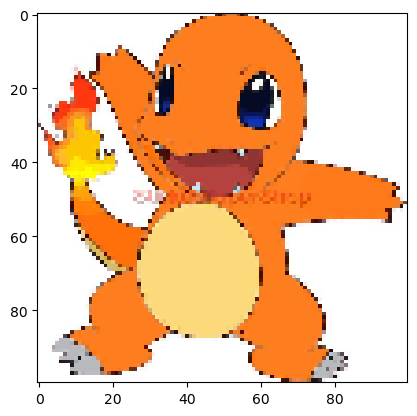

In [35]:
plt.imshow(img.astype('int'));

In [36]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [37]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 29ms/step


'Charmander'